In [1]:
sys.path.append(r'C:\Users\schafferlab\github\SNLab_ephys\external_packages\load_intan_rhd_format')
import load_intan_rhd_format as intan
from neo.rawio import neuroscoperawio

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
from xml.etree import ElementTree
def parse_xml_channel_groups(filename):
    filename = filename.replace('.xml', '').replace('.dat', '')

    tree = ElementTree.parse(filename + '.xml')
    root = tree.getroot()

    # find channels
    channel_group = []
    for grp_index, xml_chx in enumerate(
            root.find('anatomicalDescription').find('channelGroups').findall('group')):
        for xml_rc in xml_chx:
            channel_group.append([int(xml_rc.text),grp_index])
    return np.array(channel_group)

In [5]:
reader = neuroscoperawio.NeuroScopeRawIO('D:/app_ps1/data/hpc04/hpc04_day09_220221_094101/hpc04_day09_220221_094101')

In [6]:
reader.parse_header()
print(reader)
print(reader.header.keys())

NeuroScopeRawIO: D:/app_ps1/data/hpc04/hpc04_day09_220221_094101/hpc04_day09_220221_094101
nb_block: 1
nb_segment:  [1]
signal_streams: [Signals (chans: 64)]
signal_channels: [ch0grp0, ch1grp0, ch2grp0, ch3grp0 ... ch60grp0 , ch61grp0 , ch62grp0 , ch63grp0]
spike_channels: []
event_channels: []

dict_keys(['nb_block', 'nb_segment', 'signal_streams', 'signal_channels', 'spike_channels', 'event_channels'])


In [7]:
df = pd.DataFrame.from_dict(reader.header['signal_channels'])
df.head()

,name,id,sampling_rate,dtype,units,gain,offset,stream_id
0,ch0grp0,0,30000.0,int16,mV,3.051758e-10,0.0,0
1,ch1grp0,1,30000.0,int16,mV,3.051758e-10,0.0,0
2,ch2grp0,2,30000.0,int16,mV,3.051758e-10,0.0,0
3,ch3grp0,3,30000.0,int16,mV,3.051758e-10,0.0,0
4,ch4grp0,4,30000.0,int16,mV,3.051758e-10,0.0,0


In [9]:
channel_group = parse_xml_channel_groups(reader.filename)
shank = 0
channel_indexes = channel_group[channel_group[:,1] == shank,0]

In [10]:
# epoch of time around ripple, which was previously found
seconds_idx = np.array([0,1])
# convert to index
to_idx = (seconds_idx*reader.get_signal_sampling_rate()).astype(int)
# get chunk of data
raw_sigs = reader.get_analogsignal_chunk(i_start=to_idx[0],
                                        i_stop=to_idx[1],
                                        channel_indexes=channel_indexes)

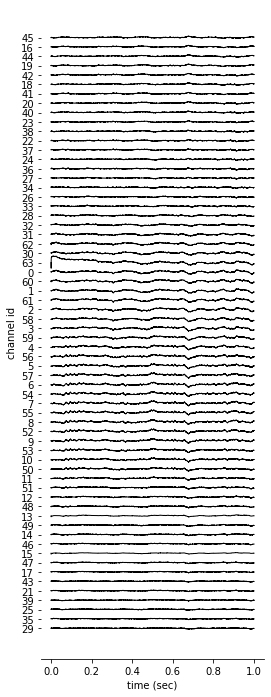

In [11]:
plt.figure(figsize=(4,12))
channel_offset = -np.arange(raw_sigs.shape[1])*4500
x = np.arange(raw_sigs.shape[0]) / reader.get_signal_sampling_rate()
plt.plot(x,raw_sigs + channel_offset,color='k',linewidth=1)
ax = plt.gca()
ax.set_yticks(channel_offset)
ax.set_yticklabels(channel_indexes)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.xlabel('time (sec)')
plt.ylabel('channel id')
plt.show()

In [30]:
raw_sigs = reader.get_analogsignal_chunk(i_start=None,
                                        i_stop=None,
                                        channel_indexes=62)

plt.plot(raw_sigs)

to_idx

In [20]:

filename = 'D:/app_ps1/data/hpc04/hpc04_day09_220221_094101/hpc04_day09_220221_094101.xml';
filename = filename.replace('.xml', '').replace('.dat', '')

tree = ElementTree.parse(filename + '.xml')
root = tree.getroot()

# find channels
channel_group = []
for grp_index, xml_chx in enumerate(
        root.find('anatomicalDescription').find('channelGroups').findall('group')):
    for xml_rc in xml_chx:
        print(xml_rc.text)
        channel_group.append([int(xml_rc.text),grp_index])

channel_group

45
16
44
19
42
18
41
20
40
23
38
22
37
24
36
27
34
26
33
28
32
31
62
30
63
0
60
1
61
2
58
3
59
4
56
5
57
6
54
7
55
8
52
9
53
10
50
11
51
12
48
13
49
14
46
15
47
17
43
21
39
25
35
29


[[45, 0],
 [16, 0],
 [44, 0],
 [19, 0],
 [42, 0],
 [18, 0],
 [41, 0],
 [20, 0],
 [40, 0],
 [23, 0],
 [38, 0],
 [22, 0],
 [37, 0],
 [24, 0],
 [36, 0],
 [27, 0],
 [34, 0],
 [26, 0],
 [33, 0],
 [28, 0],
 [32, 0],
 [31, 0],
 [62, 0],
 [30, 0],
 [63, 0],
 [0, 0],
 [60, 0],
 [1, 0],
 [61, 0],
 [2, 0],
 [58, 0],
 [3, 0],
 [59, 0],
 [4, 0],
 [56, 0],
 [5, 0],
 [57, 0],
 [6, 0],
 [54, 0],
 [7, 0],
 [55, 0],
 [8, 0],
 [52, 0],
 [9, 0],
 [53, 0],
 [10, 0],
 [50, 0],
 [11, 0],
 [51, 0],
 [12, 0],
 [48, 0],
 [13, 0],
 [49, 0],
 [14, 0],
 [46, 0],
 [15, 0],
 [47, 0],
 [17, 0],
 [43, 0],
 [21, 0],
 [39, 0],
 [25, 0],
 [35, 0],
 [29, 0]]